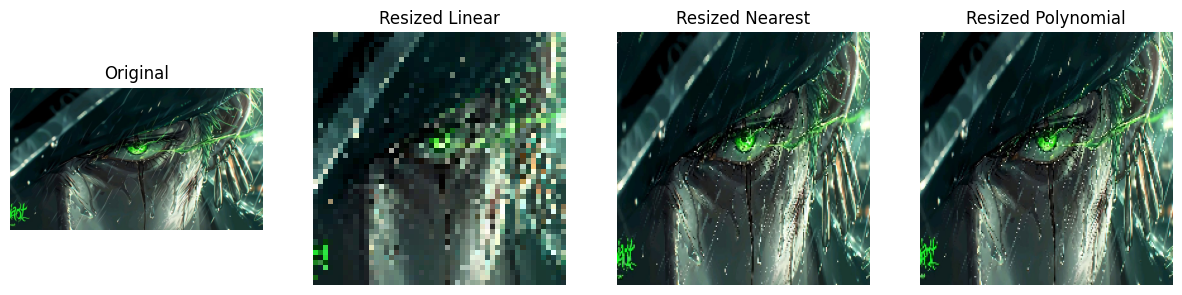

In [12]:
#Task 1
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/zoro.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


def display_images(images, titles):
    plt.figure(figsize=(15, 5))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')
    plt.show()

# Image Resizing
def resize_image(image, width, height, method):
    resized = cv2.resize(image, (width, height), interpolation=method)
    return resized

resized_linear = resize_image(image, 50, 50, cv2.INTER_LINEAR)  # downsampling
resized_nearest = resize_image(image, 200, 200, cv2.INTER_NEAREST)  # upsampling
resized_poly = resize_image(image, 200, 200, cv2.INTER_CUBIC)  # upsampling


display_images([image, resized_linear, resized_nearest, resized_poly],
               ['Original', 'Resized Linear', 'Resized Nearest', 'Resized Polynomial'])


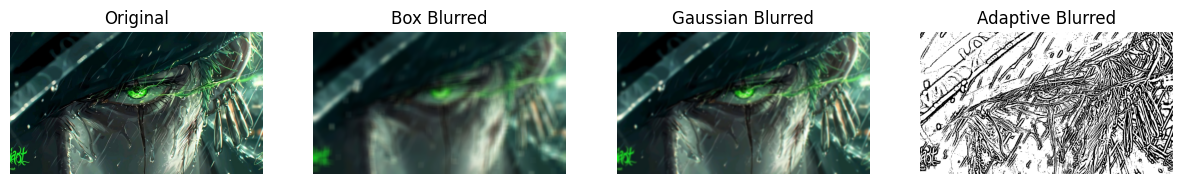

In [2]:
# Image Blurring
def blur_image(image, method, kernel_size=(15, 15)):
    if method == 'box':
        blurred = cv2.blur(image, kernel_size)
    elif method == 'gaussian':
        blurred = cv2.GaussianBlur(image, kernel_size, 0)
    elif method == 'adaptive':
        gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)   #RGB to grayscale ;  255 maximum pixel intensity
        blurred = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)#mean of neighboring pixel values for threshold calculation.
        blurred = cv2.cvtColor(blurred, cv2.COLOR_GRAY2RGB)  #Converts pixels to either 0 or 255. 0 (black) to 255 (white).
    return blurred                                           #11: Block size ; 2: Constant subtracted from the mean for fine tuning.


blurred_box = blur_image(image, 'box', kernel_size=(30, 30))
blurred_gaussian = blur_image(image, 'gaussian', kernel_size=(21, 21))
blurred_adaptive = blur_image(image, 'adaptive')

display_images([image, blurred_box, blurred_gaussian, blurred_adaptive],
               ['Original', 'Box Blurred', 'Gaussian Blurred', 'Adaptive Blurred'])

In [6]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import numpy as np

# Load dataset
digits = load_digits()
X, y = digits.data, digits.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'GradientBoostingClassifier' : GradientBoostingClassifier(n_estimators=100, random_state=42)
}


# K-Fold Cross-Validation (K=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42) #shuffles data before splitting


results = {}

for name, model in models.items():


    cross_val_accuracies = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')


    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)

    #metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f_measure = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    #ROC,AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)


    results[name] = {
        'cross_val_accuracy_mean': np.mean(cross_val_accuracies),
        'cross_val_accuracy_std': np.std(cross_val_accuracies),
        'test_accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f_measure': f_measure,
        'confusion_matrix': cm,
        'roc_auc': roc_auc
    }


    print(f"Model: {name}")
    print(f"Cross-Validation Accuracy: {np.mean(cross_val_accuracies):.4f} ± {np.std(cross_val_accuracies):.4f}") #mean ± std
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F-Measure: {f_measure:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("\n")



Model: Random Forest
Cross-Validation Accuracy: 0.9729 ± 0.0092
Test Accuracy: 0.9722
Precision: 0.9726
Recall: 0.9722
F-Measure: 0.9722
ROC AUC: 0.9998
Confusion Matrix:
[[32  0  0  0  1  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  1  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  1  0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  1  0  1  0 38]]


Model: SVM
Cross-Validation Accuracy: 0.9868 ± 0.0071
Test Accuracy: 0.9861
Precision: 0.9862
Recall: 0.9861
F-Measure: 0.9861
ROC AUC: 1.0000
Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  0  0  0 29  1]
 [ 0  0  0  0  0  1  0  1  0 38]]


Mo